# 파이썬으로 linear regression 구현하기

<문제>

당신은 푸드트럭 프랜차이즈의 대표이사입니다. 
이미 전국 97개 지점에서 푸드트럭 사업을 성공적으로 해온 당신은 성공적인 사업가로서 주목을 받고 있기는 하지만, 지금까지 새로운 지점을 내는 데 있어서 주먹구구식으로 접근해 온 것도 사실입니다. 이제는 사업이 본 궤도에 오른만큼, 좀 더 과학적으로 접근하는 것이 필요할 때입니다. 
기존의 지점들의 데이터를 무기로, 어떤 지점에 오픈을 하면 어느 정도의 매출이 나올 것인지 예측하는 모델을 만들어 봅시다.

<접근 방법>

기존 가게들로부터 추출한 인구수에 따른 이익 데이터를 가지고 있기 때문에 이를 학습 데이터 (training data) 로 사용할 수 있다.
"이익" 이라는 label 을 가지고 있기 때문에 supervised learning 으로 학습이 가능하다.
"이익" 이라는 값은 연속적인 값이기 때문에 linear regression 의 활용이 가능하다. 

<Linear regression의 목표>

Cost function 을 최소화하는 theta 값을 구한다. 

In [45]:
# 필요한 라이브러리들을 불러온다

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [46]:
# 데이터를 불러온다

path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, names = ['Population', 'Profit'])

In [47]:
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [48]:
# 이 데이터에서 인구수-이익 분포는 어떤 양상일까? 데이터를 그려 본다.

def plotData(data):
    data.plot(kind = 'scatter', x = 'Population', y = 'Profit')
    plt.show()

In [49]:
# 그림 그려주기 방법 2
def plotData2(data):
    x = np.linspace(data.Population.min(), data.Population.max())
    fig, ax = plt.subplots(figsize=(8,4))
    ax.scatter(data.Population, data.Profit, label='Traning Data')  
    ax.legend(loc=2)  
    ax.set_xlabel('Population')  
    ax.set_ylabel('Profit')  
    ax.set_title('Training Data : Population vs. Profit')

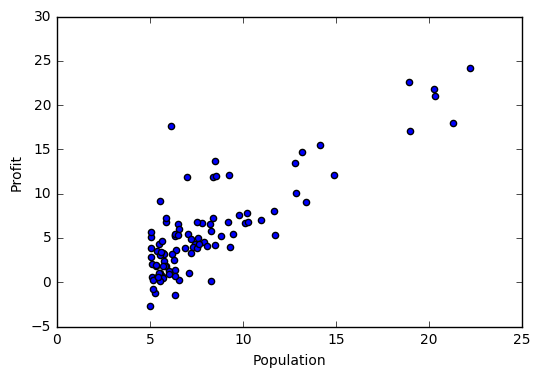

In [50]:
plotData(data)
# plotData2(data)

In [51]:
# Linear regression은 h(x) = θ0 + θ1x 인데 원형은 θ0x0 + θ1x1 의 형태
# x0과 x1의 형태로 만들어 주기 위해 컬럼을 추가해 준다. 

data.insert(0, 'Ones', 1)

In [52]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [53]:
# training set X 를 추출해 준다

X = data.loc[:,'Ones':'Population'] # pandas 에서 loc은 label 기반의 인덱싱.
# X = data.iloc[:,0:2]     # pandas 에서 iloc은 integer 기반의 인덱싱. 위와 동일 결과.

In [54]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [61]:
X.shape

(97, 2)

In [62]:
# training set y를 추출해 준다

y = data.iloc[:,2:3]
# y = data.loc[:,"Profit"]     # 위와 동일 결과

In [63]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [64]:
y.shape

(97, 1)

In [65]:
# Pandas의 Data frame 형태인 X와 y를 Numpy의 matrix 형태로 변환해 준다. 

X = np.matrix(X)
y = np.matrix(y)

In [66]:
# Matrix화된 X와 y의 차원을 살펴보자

X.shape, y.shape

((97, 2), (97, 1))

In [67]:
# θ를 생성해 주자. 일단 초기값을 0으로 준다. 

theta = np.matrix(np.zeros(2))

In [68]:
# θ의 차원도 살펴보자

theta.shape

(1, 2)

In [69]:
# 이제 θ, X, y 가 모두 준비되었으니 cost 를 구할 준비가 되었다. 
# cost function을 함수로 구현하자.

def computeCost(X, y, theta):
    return np.sum(np.power((X*theta.T - y),2))/(2*X.shape[0])

In [70]:
# cost function을 호출하여 cost 를 구한다.
cost_initial = computeCost(X, y, theta)

In [71]:
cost_initial

32.072733877455676

In [72]:
cost_initial.shape

()

<중간 정리>

우리는 θ 벡터의 원소 (θ0과 θ1) 를 모두 0으로 초기화하여 cost를 구해 보았다. 그 결과는 약 32.07.
우리는 cost를 최소화하는 θ 값을 구해야 하기 때문에 이제 θ의 업데이트 규칙을 적용하도록 하자. 

<θ 업데이트 규칙>

θ 업데이트 규칙은 Gradient Descent 기법을 활용한다. 이는 cost function을 미분함으로써 구한다. 
미분한다는 것은 곧 cost function의 기울기라는 의미이다. 
기존의 θ에서 기울기를 곱해 주는 형태를 띄기 때문에 기울기가 +이면 θ는 작아지고, 기울기가 -이면 θ는 커지게 된다. 
이런 식으로 θ가 최소값을 가질 때까지 반복하게 되는 것이다. 

새로운 변수 2개가 도입된다. 
1) Learning rate (alpha) : 업데이트의 페이스를 조절해 주는 역할을 한다.
2) 반복수 : 몇번 반복할 것인지 정해 준다. 

In [73]:
# 최적의 θ 값을 리턴해 주는 함수 gradientDescent()를 만들어 준다. 
# 추가로 cost의 추이를 보여주는 코드 넣어준다. 

def gradientDescent(X, y, theta, alpha, iters):
    theta_temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)
    for i in range(iters):
        error = X*theta.T - y
        for j in range(theta.shape[1]):
            theta_temp[0,j] = theta[0,j] - (alpha/X.shape[0])*np.sum(np.multiply(error, X[:,j]))
        theta = theta_temp
        cost[i] = computeCost(X, y, theta)
#         print i, ":", cost[i], ":", ((cost[i] - cost[i-1]) / cost[i-1])*100, "%"
    return theta, cost

In [84]:
alpha = 0.01
iters = 5000

In [85]:
theta_minimized, cost = gradientDescent(X, y, theta, alpha, iters)

In [86]:
theta_minimized

matrix([[-3.89530051,  1.19298539]])

#### [참고] Normal Equation 으로 구해도 역시 같은 값이 나오는 것을 확인할 수 있다.

In [88]:
theta_optimized_normal_equation = np.linalg.inv(X.T*X)*X.T*y
theta_optimized_normal_equation

matrix([[-3.89578088],
        [ 1.19303364]])

In [89]:
computeCost(X, y, theta_minimized)

4.4769713969828047

[]

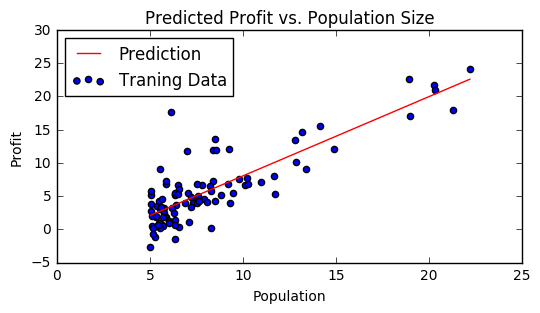

In [90]:
# 이제 θ과 θ을 구했으니 최적화된 직선을 그려보자 (y = 1.1930x -3.8957)

x = np.linspace(data.Population.min(), data.Population.max(), 100)  # 100등분해 준다
y = theta_minimized[0, 0] + theta_minimized[0, 1] * x

fig, ax = plt.subplots(figsize=(6,3))  
ax.plot(x, y, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  

ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')
plt.plot()

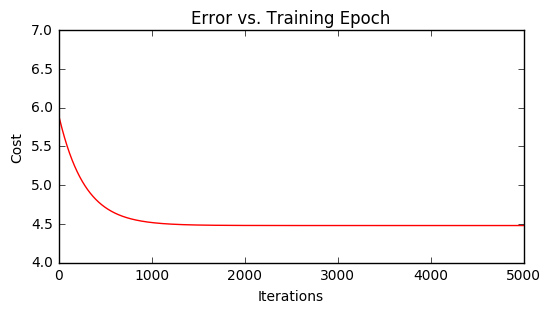

In [91]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

In [92]:
def predictProfit(x):
    prediction = theta_minimized[0,0] + x*theta_minimized[0,1]
    return prediction

In [93]:
predictProfit(5)

2.0696264195839298